# Patient Mortality Forecast

1. EDA
        1 - 1: Quantitive Features
        1 - 2: Qualitative Features
2. Model Building
        Support Vector Machines, 
        KNN, 
        Logistic Regression, 
        Random Forest, 
        Naive Bayes, 
        Perceptron, 
        Stochastic Gradient Decent, 
        Linear SVC, 
        Decision Tree
3. Model Testing
        F1 score
        Jaccard
        cv on test datasets

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [420]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

<h1>1. EDA

In [18]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<h3>1 - 1 Quantitive Features

Skewness: 0.42306190672863536
Kurtosis: -0.18487053195417413


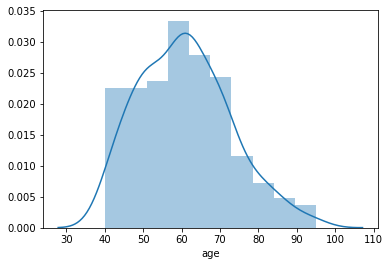

In [419]:
sns.distplot(df['age'])
print('Skewness: '+ str(df['age'].skew())) 
print("Kurtosis: " + str(df['age'].kurt()))

Acceptable Kurtosis and skewness level(Skewness: -0.5 - 0.5. Kurtosis: 1 and -1)

In [37]:
df_surv = df[df["DEATH_EVENT"]==0]
df_not_surv = df[df["DEATH_EVENT"]==1]

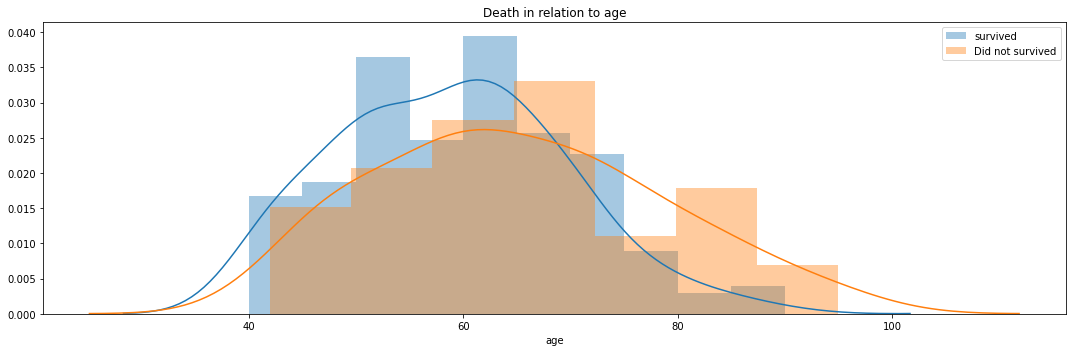

In [84]:
plt.figure(figsize=(15,5))

sns.distplot(df_surv['age'])
sns.distplot(df_not_surv['age'])
plt.legend(['survived', 'Did not survived'])

plt.title('Death in relation to age')

plt.tight_layout()
plt.show()

mortality rates are higher as age increase

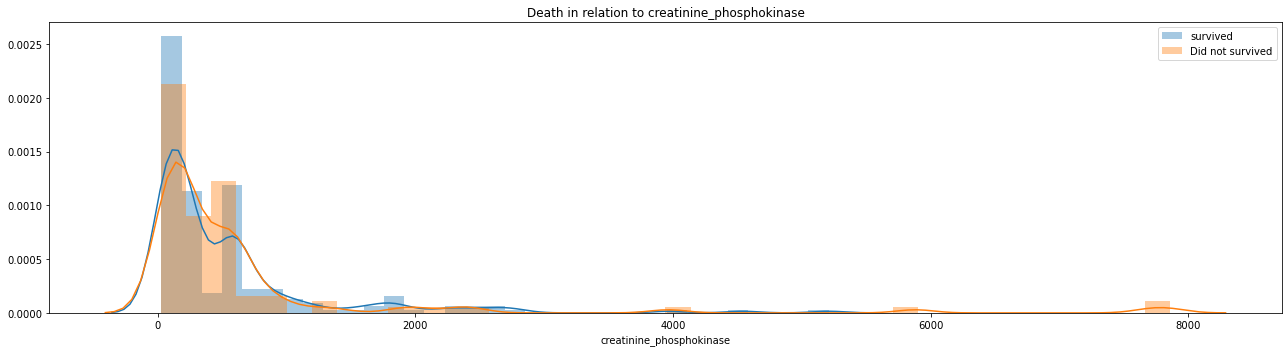

In [69]:
plt.figure(figsize=(18,5))

# level of the CPK enzyme in the blood
sns.distplot(df_surv['creatinine_phosphokinase'])
sns.distplot(df_not_surv['creatinine_phosphokinase'])
plt.legend(['survived', 'Did not survived'])

plt.title('Death in relation to creatinine_phosphokinase')

plt.tight_layout()
plt.show()

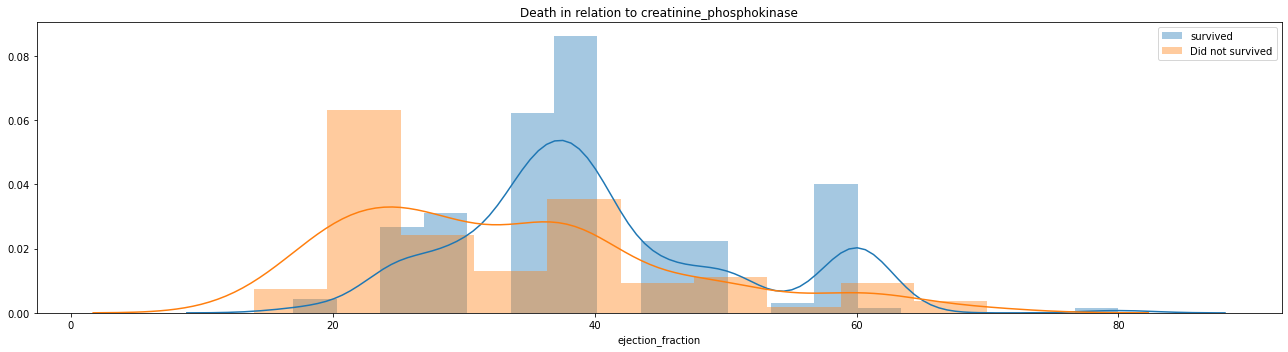

In [72]:
plt.figure(figsize=(18,5))

# ejection_fraction: percentage of blood leaving the heart at each contraction (percentage)
sns.distplot(df_surv['ejection_fraction'])
sns.distplot(df_not_surv['ejection_fraction'])
plt.legend(['survived', 'Did not survived'])

plt.title('Death in relation to ejection_fraction')

plt.tight_layout()
plt.show()

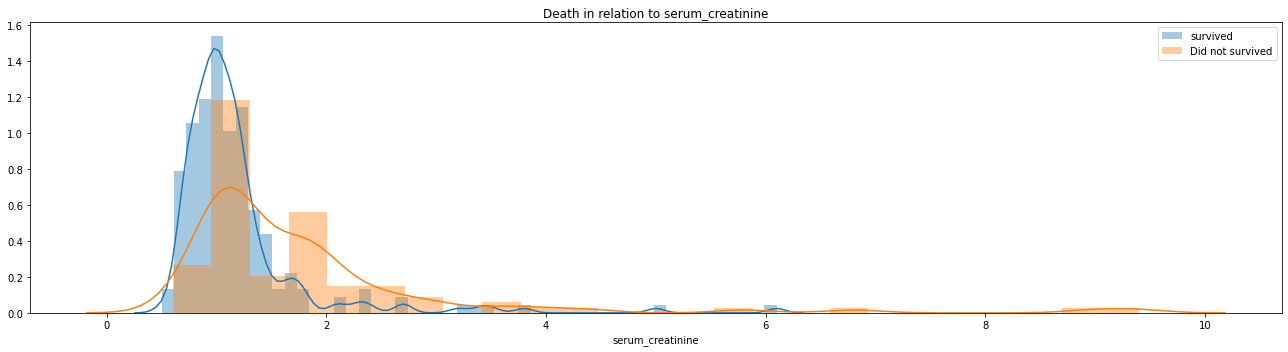

In [76]:
# serum_creatinine: level of serum creatinine in the blood (mg/dL)
plt.figure(figsize=(18,5))


sns.distplot(df_surv['serum_creatinine'])
sns.distplot(df_not_surv['serum_creatinine'])
plt.legend(['survived', 'Did not survived'])

plt.title('Death in relation to serum_creatinine')

plt.tight_layout()
plt.show()

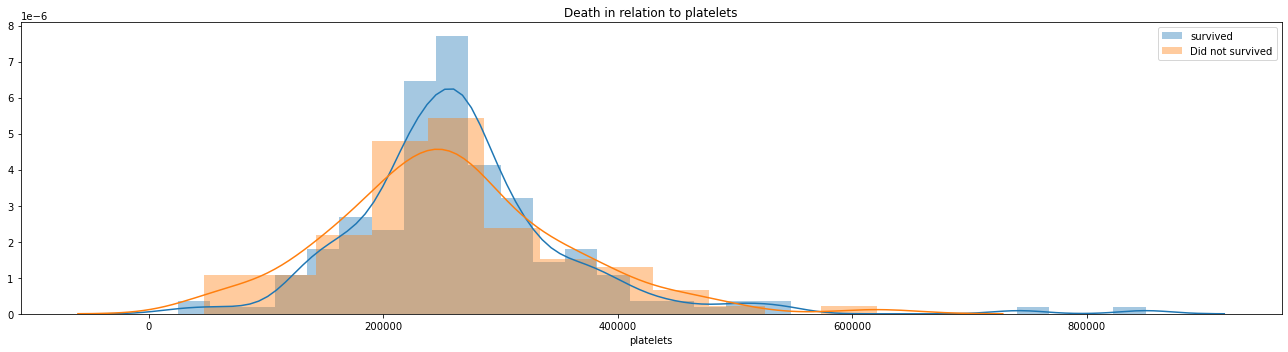

In [75]:

plt.figure(figsize=(18,5))


sns.distplot(df_surv['platelets'])
sns.distplot(df_not_surv['platelets'])
plt.legend(['survived', 'Did not survived'])

plt.title('Death in relation to platelets')

plt.tight_layout()
plt.show()

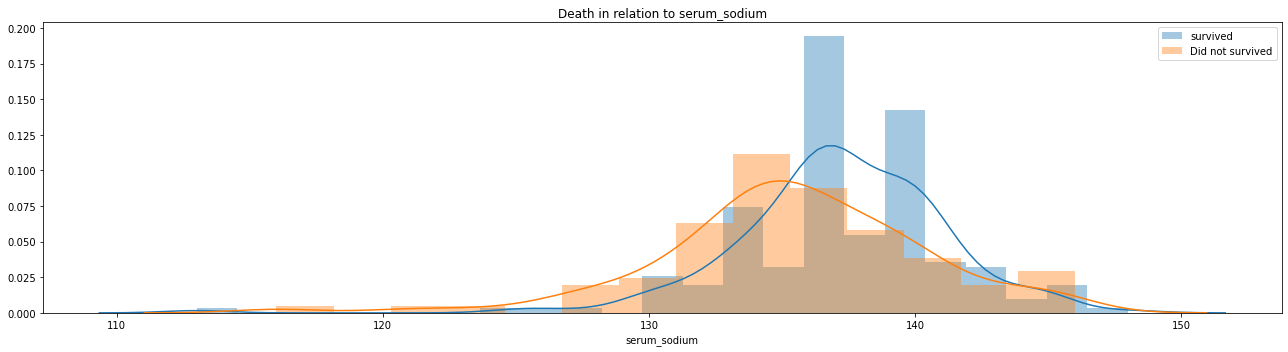

In [77]:

plt.figure(figsize=(18,5))


sns.distplot(df_surv['serum_sodium'])
sns.distplot(df_not_surv['serum_sodium'])
plt.legend(['survived', 'Did not survived'])

plt.title('Death in relation to serum_sodium')

plt.tight_layout()
plt.show()

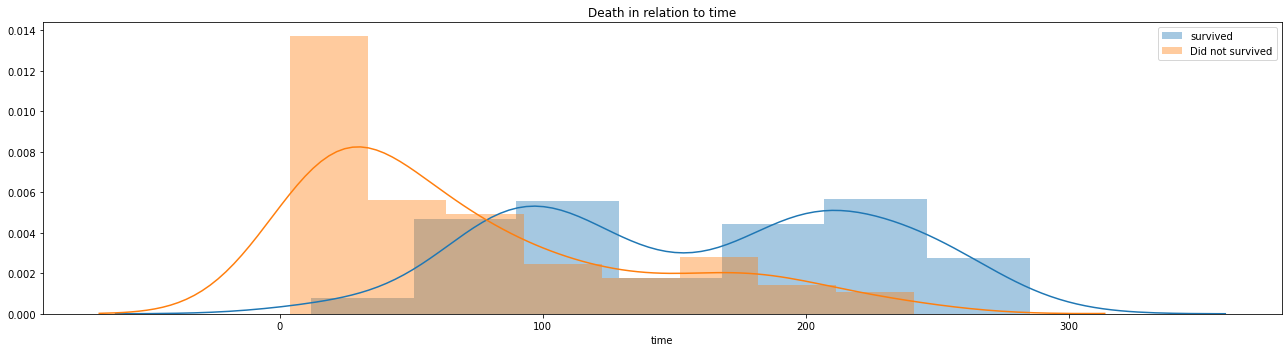

In [80]:

plt.figure(figsize=(18,5))


sns.distplot(df_surv['time'])
sns.distplot(df_not_surv['time'])
plt.legend(['survived', 'Did not survived'])

plt.title('Death in relation to time')

plt.tight_layout()
plt.show()

<h3>1 - 2 Qualitative Features

DEATH_EVENT
anaemia DEATH_EVENT             
0       0               0.705882
        1               0.294118
1       0               0.643411
        1               0.356589

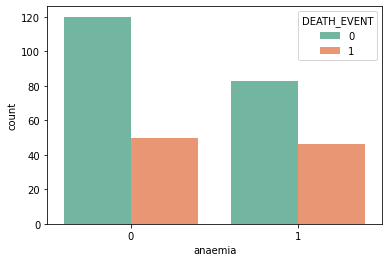

In [23]:
# graph of anaemia in relation to death_event
sns.countplot(x="anaemia", hue="DEATH_EVENT", data=df, palette = "Set2")

# table of anaemia in relation to death_event
df.groupby(['anaemia'])['DEATH_EVENT'].value_counts(normalize=True).to_frame()

anaemia means decrease of red blood cells or hemoglobin, and the graph shows that those who does show a decrease of red blood cells or hemoglobin has .16 chance higher to have heart failure than those who does not.

DEATH_EVENT
diabetes DEATH_EVENT             
0        0               0.678161
         1               0.321839
1        0               0.680000
         1               0.320000

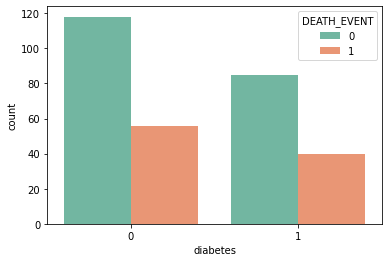

In [70]:

# graph of diabetes in relation to death_event
sns.countplot(x="diabetes", hue="DEATH_EVENT", data=df, palette = "Set2")

# table of diabetes in relation to death_event
df.groupby(['diabetes'])['DEATH_EVENT'].value_counts(normalize=True).to_frame()

not much difference

DEATH_EVENT
high_blood_pressure DEATH_EVENT             
0                   0               0.706186
                    1               0.293814
1                   0               0.628571
                    1               0.371429

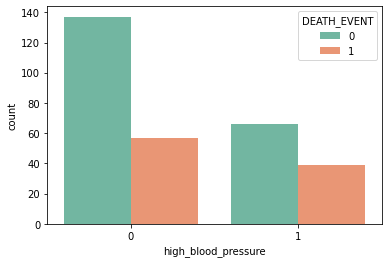

In [73]:
# graph of high_blood_pressure in relation to death_event
sns.countplot(x="high_blood_pressure", hue="DEATH_EVENT", data=df, palette = "Set2")

# table of high_blood_pressure in relation to death_event
df.groupby(['high_blood_pressure'])['DEATH_EVENT'].value_counts(normalize=True).to_frame()

There is an .18 observable death rate difference between those who has high_blood_pressure and those who don't

DEATH_EVENT
sex DEATH_EVENT             
0   0               0.676190
    1               0.323810
1   0               0.680412
    1               0.319588

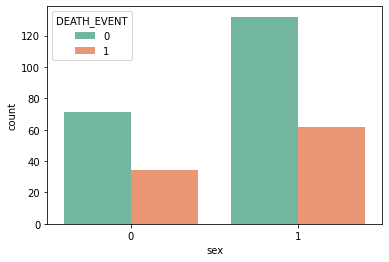

In [78]:
# graph of sex in relation to death_event
sns.countplot(x="sex", hue="DEATH_EVENT", data=df, palette = "Set2")

# table of sex in relation to death_event
df.groupby(['sex'])['DEATH_EVENT'].value_counts(normalize=True).to_frame()

no difference

DEATH_EVENT
smoking DEATH_EVENT             
0       0               0.674877
        1               0.325123
1       0               0.687500
        1               0.312500

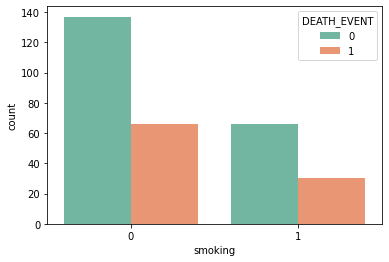

In [79]:
 
# graph of smoking in relation to death_event
sns.countplot(x="smoking", hue="DEATH_EVENT", data=df, palette = "Set2")

# table of smoking in relation to death_event
df.groupby(['smoking'])['DEATH_EVENT'].value_counts(normalize=True).to_frame()

<h1>2. Model Building

In [421]:
# Train test split
df_train = df.sample(frac = 0.8)    #train/cross-val
df_test = df.drop(df_train.index)   #test

In [422]:
# split dependent variable and independent variables 
X_train = df_train.drop("DEATH_EVENT", axis=1)
Y_train = df_train["DEATH_EVENT"]
X_test  = df_test.drop("DEATH_EVENT", axis=1).copy()
Y_test = df_test["DEATH_EVENT"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((239, 12), (239,), (60, 12), (60,))

In [423]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [424]:
# SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

# Navie Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)

# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)

# linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

# SGD Classifier
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)

# logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

C:\Users\leo\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [425]:
# lets look at exactly what the model looks like for logistic regression
coeff_df = pd.DataFrame(df_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,anaemia,5.015910e-02
8,sex,7.742558e-03
7,serum_sodium,4.682291e-03
9,smoking,2.357704e-04
2,diabetes,1.159848e-04
1,creatinine_phosphokinase,9.559607e-05
6,serum_creatinine,-1.478288e-07
10,time,-2.913846e-05
3,ejection_fraction,-1.760724e-04
5,platelets,-6.619924e-04


In [426]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.67
2,Logistic Regression,80.00
4,Naive Bayes,73.33
8,Decision Tree,71.67
0,Support Vector Machines,61.67
6,Stochastic Gradient Decent,61.67
1,KNN,51.67
5,Perceptron,38.33
7,Linear SVC,38.33


<h4> Select the top 4 models for further test: f1, jaccard, CV

In [427]:
# cv with test dataset

scores = cross_val_score(decision_tree, X_test, Y_test, cv=5)
dt_cv = ("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(random_forest, X_test, Y_test, cv=5)
rf_cv = ("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(logreg, X_test, Y_test, cv=5)
logreg_cv = ("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(gaussian, X_test, Y_test, cv=5)
navie_B = ("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\leo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [428]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [429]:
Y_pred = random_forest.predict(X_test)
RF_f1 = round(f1_score(Y_test, Y_pred, average='weighted'), 2)
RF_jaccard = round(jaccard_score(Y_test, Y_pred), 2)


Y_pred = decision_tree.predict(X_test)
dt_f1 = round(f1_score(Y_test, Y_pred, average='weighted'), 2)
dt_jaccard = round(jaccard_score(Y_test, Y_pred), 2)


Y_pred = logreg.predict(X_test)
lr_f1 = round(f1_score(Y_test, Y_pred, average='weighted'), 2)
lr_jaccard = round(jaccard_score(Y_test, Y_pred), 2)

Y_pred = gaussian.predict(X_test)
nb_f1 = round(f1_score(Y_test, Y_pred, average='weighted'), 2)
nb_jaccard = round(jaccard_score(Y_test, Y_pred), 2)

In [430]:
df_report = pd.DataFrame(np.array([['Navie Bayes', nb_jaccard, nb_f1,navie_B], 
                                   ['Decision Tree',dt_jaccard, dt_f1, dt_cv], 
                                   ['Random Forest',RF_jaccard, RF_f1, rf_cv],
                                   ["Logistic Regression", lr_jaccard, lr_f1, logreg_cv]]),
                           columns=['Algorithm', 'Jaccard', 'F1-score', "cv"])
df_report.set_index('Algorithm')

,Jaccard,F1-score,cv
Algorithm,,,
Navie Bayes,0.36,0.7,Accuracy: 0.68 (+/- 0.34)
Decision Tree,0.43,0.71,Accuracy: 0.68 (+/- 0.36)
Random Forest,0.69,0.87,Accuracy: 0.68 (+/- 0.24)
Logistic Regression,0.54,0.79,Accuracy: 0.65 (+/- 0.16)
